Final Project. Classification of Pima Indians and Iraq Dataset

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
# Model selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import xgboost as xgb

Data Preprocessing for Pima and Iraq Dataset
models being used are Random forest, Logistic Regression, Decision Tress, SVM, and Neural Networks

In [166]:
iraqdata = pd.read_csv("Iraqdata.csv")
iraqdata
#Class has three variables, N, P, Y. N for no, P for pre-diabetic, and Y for yes. Going to change the P values to N values as we care about figuring out whether a person is diabetic or not

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [167]:
iraqdata.n
#data looks normal for scaling

,count,mean,std,min,25%,50%,75%,max
ID,1000.0,340.500000,2.403977e+02,1.0,125.75,300.5,550.25,800.00
No_Pation,1000.0,270551.408000,3.380758e+06,123.0,24063.75,34395.5,45384.25,75435657.00
AGE,1000.0,53.528000,8.799241e+00,20.0,51.00,55.0,59.00,79.00
Urea,1000.0,5.124743,2.935165e+00,0.5,3.70,4.6,5.70,38.90
Cr,1000.0,68.943000,5.998475e+01,6.0,48.00,60.0,73.00,800.00
HbA1c,1000.0,8.281160,2.534003e+00,0.9,6.50,8.0,10.20,16.00
Chol,1000.0,4.862820,1.301738e+00,0.0,4.00,4.8,5.60,10.30
TG,1000.0,2.349610,1.401176e+00,0.3,1.50,2.0,2.90,13.80
HDL,1000.0,1.204750,6.604136e-01,0.2,0.90,1.1,1.30,9.90
LDL,1000.0,2.609790,1.115102e+00,0.3,1.80,2.5,3.30,9.90


In [168]:
#Following is Data Preprocessing for Pima Indian Diabetes Dataset
pimadata= pd.read_csv("diabetes.csv")
pimadata

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [169]:
pimadata.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
pimadata.n

In [170]:
#0s in the folllowing columns, replacing them with mean value. 
pimadata.Glucose = pimadata.Glucose.replace(0,pimadata.Glucose.mean())

In [171]:

pimadata.BloodPressure = pimadata.BloodPressure.replace(0,pimadata.BloodPressure.mean())

In [172]:
pimadata.SkinThickness = pimadata.SkinThickness.replace(0,pimadata.SkinThickness.mean())

In [173]:
pimadata.Insulin = pimadata.Insulin.replace(0,pimadata.Insulin.mean())

In [174]:
pimadata.BMI = pimadata.BMI.replace(0,pimadata.BMI.mean())


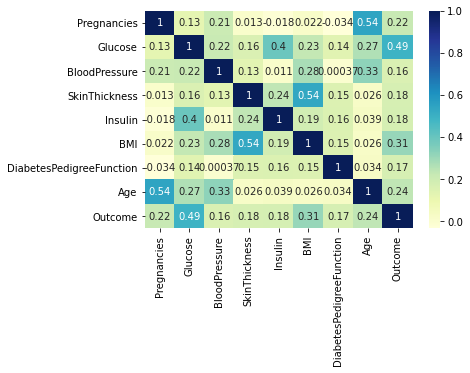

In [185]:

#measuring correlation between values. 
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
dataplot = sb.heatmap(pimadata.corr(), cmap="YlGnBu", annot=True)
  

mp.show()

In [175]:
x1=pimadata.iloc[:,:-1].values
y1=pimadata.iloc[:,-1].values

Models for Pima Indians

In [176]:
from sklearn.model_selection import train_test_split
X_trainP,X_testP,y_train,y_test = train_test_split(x1,y1,test_size = 0.30, random_state = 0)

In [177]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_trainP)
X_test = ss.transform(X_testP)

In [178]:
y1

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [179]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid_cv = RandomizedSearchCV(SVC(), param_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Best Params", grid_cv.best_params_)

Best Params {'kernel': 'rbf', 'gamma': 0.01, 'C': 1}


In [183]:
svm_clf = SVC(C=1, kernel='sigmoid', gamma=0.01)
xfit = svm_clf.fit(X_train,y_train)

y_score = xfit.decision_function(X_test)
y_pred=xfit.predict(X_test)


In [182]:


y_pred=xfit.p redict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[143  14]
 [ 38  36]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       157
           1       0.72      0.49      0.58        74

    accuracy                           0.77       231
   macro avg       0.76      0.70      0.71       231
weighted avg       0.77      0.77      0.76       231



In [37]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
param_grid = {'criterion':['gini','entropy'],'max_depth':np.arange(2,10),'min_samples_leaf':[0.2,0.4,0.6,0.8,0.9,1]}
grid_cv = RandomizedSearchCV(dtc, param_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Best Params", grid_cv.best_params_)

Best Params {'min_samples_leaf': 0.2, 'max_depth': 4, 'criterion': 'gini'}


In [38]:
clf = DecisionTreeClassifier(min_samples_leaf=1, max_depth=7, criterion="entropy")
xfit = clf.fit(X_train,y_train)

y_pred=xfit.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[140  17]
 [ 40  34]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       157
           1       0.67      0.46      0.54        74

    accuracy                           0.75       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.74      0.75      0.74       231



In [39]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support


In [197]:
lda = LDA(n_components=1)
train_x = lda.fit_transform(X_train, y_train)
test_x = lda.transform(X_test)
param_grid = { 
    'n_estimators': [10,20,50,70,100],
    'max_depth': [2,4,6,8,10],
    'class_weight':['balanced'],
    'min_samples_split':[2,4,6],
}

clf = RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_rfc.fit(X_train, y_train)
print (CV_rfc.best_params_, CV_rfc.best_score_)

clf = RandomForestClassifier( class_weight= 'balanced', max_depth= 6, min_samples_split= 2, 
                             n_estimators= 100, random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

{'class_weight': 'balanced', 'max_depth': 4, 'min_samples_split': 6, 'n_estimators': 50} 0.7652474904811353
[[132  25]
 [ 25  49]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       157
           1       0.66      0.66      0.66        74

    accuracy                           0.78       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.78      0.78      0.78       231



In [41]:
from xgboost  import XGBClassifier
dtc = XGBClassifier()
param_grid = {'booster':['gbtree','gblinear'],
             'colsample_bytree':[0.4,0.6,0.8,1],
             'learning_rate':[0.01,0.1,0.2,0.4],
             'max_depth':[2,3,4,6],
             'n_estimators':[200,300,400,500],
              'subsample':[0.4,0.6,0.8,1]}
grid_cv = RandomizedSearchCV(dtc, param_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Best Params", grid_cv.best_params_)

[07:47:36] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:47:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Params {'subsample': 0.4, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.4, 'booster': 'gblinear'}


C:\Users\dmatt\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [42]:
clf = XGBClassifier(max_depth=4, n_estimators=300, learning_rate=0.4, colsample_bytree=1, booster='gblinear')
xfit = clf.fit(X_train,y_train)


[07:47:36] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:47:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [43]:
y_pred=xfit.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[141  16]
 [ 35  39]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



In [44]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform
from sklearn.model_selection import RepeatedStratifiedKFold
model = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
...
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7759142790589332
Best Hyperparameters: {'C': 0.4152561875287414, 'penalty': 'l1', 'solver': 'liblinear'}


In [45]:
clf=LogisticRegression(C=0.4152561875287414, penalty='l1', solver='liblinear')

In [46]:
xfit = clf.fit(X_train,y_train)
y_pred=xfit.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[140  17]
 [ 36  38]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.69      0.51      0.59        74

    accuracy                           0.77       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.76      0.77      0.76       231



In [91]:
iraqdata.head(150)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,12,685,M,55,4.8,60,6.0,3.6,3.0,1.5,0.8,1.4,24.0,P
146,20,19112,F,40,2.1,52,5.9,2.1,2.3,0.9,2.8,1.2,30.0,P
147,41,1655,M,40,3.4,64,5.7,6.5,3.8,1.0,3.9,1.7,31.0,P
148,60,546543,F,35,4.4,37,5.8,4.0,2.5,1.3,2.3,1.6,32.0,P


Data Preprocess for Iraq

In [187]:
iraqdata['CLASS']= iraqdata['CLASS'].astype('category')
iraqdata['Gender']= iraqdata['Gender'].astype('category')

In [188]:
from sklearn.preprocessing import LabelEncoder

In [189]:
labelencoder = LabelEncoder()

In [190]:
iraqdata['Genderenc']= labelencoder.fit_transform(iraqdata['Gender']) 
iraqdata['Classenc']= labelencoder.fit_transform(iraqdata['CLASS']) 


In [191]:
iraqdata


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,Genderenc,Classenc
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0,0
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,1,0
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0,0
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0,0
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y,1,3
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y,1,4
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y,1,4
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y,1,4


In [192]:
iraqdata=iraqdata.drop(columns=['CLASS', 'Gender'])

In [193]:
iraqdata=iraqdata.drop(columns=['ID', 'No_Pation'])

In [194]:
iraqdata

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Genderenc,Classenc
0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,0
1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,1,0
2,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,0
3,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,0
4,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,1,3
996,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,1,4
997,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,1,4
998,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,1,4


                AGE      Urea        Cr     HbA1c      Chol        TG  \
AGE        1.000000  0.105092  0.054941  0.379136  0.036649  0.148204   
Urea       0.105092  1.000000  0.624134 -0.023603  0.001852  0.040980   
Cr         0.054941  0.624134  1.000000 -0.037412 -0.007097  0.056579   
HbA1c      0.379136 -0.023603 -0.037412  1.000000  0.177489  0.218556   
Chol       0.036649  0.001852 -0.007097  0.177489  1.000000  0.321789   
TG         0.148204  0.040980  0.056579  0.218556  0.321789  1.000000   
HDL       -0.020038 -0.036994 -0.023804  0.028933  0.103814 -0.083001   
LDL        0.016105 -0.007301  0.039479  0.011057  0.416665  0.015378   
VLDL      -0.087903 -0.011191  0.009615  0.073462  0.076294  0.144570   
BMI        0.375956  0.045618  0.054746  0.413350  0.013678  0.110757   
Genderenc  0.022083  0.114498  0.151983 -0.000411 -0.062875  0.049776   
Classenc   0.411356  0.063214  0.037173  0.542134  0.163269  0.179990   

                HDL       LDL      VLDL       BMI 

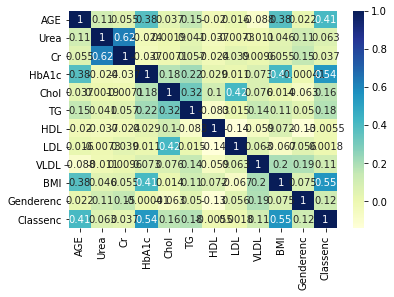

In [196]:
print(iraqdata.corr())
dataplot = sb.heatmap(iraqdata.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

In [134]:
x1=iraqdata.iloc[:,:-1].values
y1=iraqdata.iloc[:,-1].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [136]:
from sklearn.model_selection import train_test_split
X_trainP,X_testP,y_train,y_test = train_test_split(x1,y1,test_size = 0.30)

In [137]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_trainP)
X_test = ss.transform(X_testP)

In [138]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid_cv = RandomizedSearchCV(SVC(), param_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Best Params", grid_cv.best_params_)

C:\Users\dmatt\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Best Params {'kernel': 'poly', 'gamma': 0.1, 'C': 100}


In [143]:
svm_clf = SVC(C=100, kernel='poly', gamma=0.1)
xfit = svm_clf.fit(X_train,y_train)

y_pred=xfit.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 25   1   0   2   0]
 [  0   0   0   0   0]
 [  0   0  10   1   0]
 [  6   2   5 245   0]
 [  0   0   0   3   0]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.00      0.00      0.00         0
           2       0.67      0.91      0.77        11
           3       0.98      0.95      0.96       258
           4       0.00      0.00      0.00         3

    accuracy                           0.93       300
   macro avg       0.49      0.55      0.52       300
weighted avg       0.94      0.93      0.94       300



C:\Users\dmatt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmatt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [144]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
param_grid = {'criterion':['gini','entropy'],'max_depth':np.arange(2,10),'min_samples_leaf':[0.2,0.4,0.6,0.8,0.9,1]}
grid_cv = RandomizedSearchCV(dtc, param_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Best Params", grid_cv.best_params_)

Best Params {'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'entropy'}


C:\Users\dmatt\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


In [145]:
clf = DecisionTreeClassifier(min_samples_leaf=1, max_depth=5, criterion="entropy")
xfit = clf.fit(X_train,y_train)

y_pred=xfit.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 28   0   0   0]
 [  0  10   1   0]
 [  1   0 257   0]
 [  0   0   3   0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           2       1.00      0.91      0.95        11
           3       0.98      1.00      0.99       258
           4       0.00      0.00      0.00         3

    accuracy                           0.98       300
   macro avg       0.74      0.73      0.73       300
weighted avg       0.97      0.98      0.98       300



C:\Users\dmatt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support


In [148]:
lda = LDA(n_components=1)
train_x = lda.fit_transform(X_train, y_train)
test_x = lda.transform(X_test)
param_grid = { 
    'n_estimators': [10,20,50,70,100],
    'max_depth': [2,4,6,8,10],
    'class_weight':['balanced'],
    'min_samples_split':[2,4,6],
}

clf = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_rfc.fit(X_train, y_train)
print (CV_rfc.best_params_, CV_rfc.best_score_)

xfit = RandomForestClassifier( class_weight= 'balanced', max_depth= 10, min_samples_split= 4, 
                             n_estimators= 50)
xfit.fit(X_train,y_train)
y_pred=xfit.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\dmatt\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 50} 0.9814285714285715
[[ 27   0   1   0]
 [  0  11   0   0]
 [  3   0 255   0]
 [  0   0   3   0]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           2       1.00      1.00      1.00        11
           3       0.98      0.99      0.99       258
           4       0.00      0.00      0.00         3

    accuracy                           0.98       300
   macro avg       0.72      0.74      0.73       300
weighted avg       0.97      0.98      0.97       300



C:\Users\dmatt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
from xgboost  import XGBClassifier
dtc = XGBClassifier()
param_grid = {'booster':['gbtree','gblinear'],
             'colsample_bytree':[0.4,0.6,0.8,1],
             'learning_rate':[0.01,0.1,0.2,0.4],
             'max_depth':[2,3,4,6],
             'n_estimators':[200,300,400,500],
              'subsample':[0.4,0.6,0.8,1]}
grid_cv = RandomizedSearchCV(dtc, param_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Best Params", grid_cv.best_params_)

C:\Users\dmatt\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\dmatt\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:28:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Params {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 0.8, 'booster': 'gbtree'}


In [150]:
clf = XGBClassifier(max_depth=4, n_estimators=300, learning_rate=0.2, colsample_bytree=0.8, booster='gbtree')
xfit = clf.fit(X_train,y_train)
y_pred=xfit.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[08:28:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[ 25   0   3   0]
 [  0  11   0   0]
 [  2   0 256   0]
 [  0   0   3   0]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           2       1.00      1.00      1.00        11
           3       0.98      0.99      0.98       258
           4       0.00      0.00      0.00         3

    accuracy                           0.97       300
   macro avg       0.73      0.72      0.72       300
weighted avg       0.96      0.97      0.97       300



C:\Users\dmatt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [151]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform
from sklearn.model_selection import RepeatedStratifiedKFold
model = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
...
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

C:\Users\dmatt\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\dmatt\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\dmatt\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best Score: 0.9052380952380951
Best Hyperparameters: {'C': 0.030673510835226868, 'penalty': 'l2', 'solver': 'newton-cg'}


In [152]:
clf=LogisticRegression(C=0.030673510835226868, penalty='l2', solver='newton-cg')

In [153]:
xfit = clf.fit(X_train,y_train)
y_pred=xfit.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 24   0   4   0]
 [  1   0  10   0]
 [  5   0 253   0]
 [  0   0   3   0]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        28
           2       0.00      0.00      0.00        11
           3       0.94      0.98      0.96       258
           4       0.00      0.00      0.00         3

    accuracy                           0.92       300
   macro avg       0.43      0.46      0.45       300
weighted avg       0.88      0.92      0.90       300



C:\Users\dmatt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
